# Expnet prediction

In [8]:
import numpy as np
import torch
from torch.autograd import Variable
import cv2
import utils.img_allign_expnet as iae
import utils.model_phase2_expnet_CPU as mpe
import os
import matplotlib.pyplot as plt

emo_list = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise" ]

In [9]:
def ReadImage(pathname, label=None, imgAlligned = True): 
        if imgAlligned:
            img = cv2.imread(pathname)
        else:
            img = iae.img_align(pathname, label)
        original_img = img
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (96, 96), interpolation=cv2.INTER_LINEAR)
        img = np.transpose(img, (2, 0, 1))
        img = img.astype(np.float32) / 255.0
        I_ = torch.from_numpy(img).unsqueeze(0)
        
        return I_, original_img



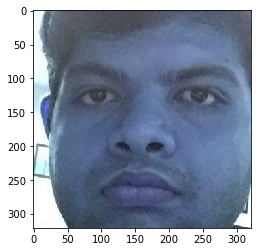

contempt


In [10]:
model_p2 = mpe.ExpNet_p2(useCuda=False, gpuDevice=0)
model_p2.load_state_dict(torch.load(os.path.join('./model', 'expnet_p2.pt'),\
                                    map_location=lambda storage, loc: storage))

folder = "data/predict_images"
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    if os.path.isfile(file_path):
        img, cropped = ReadImage(file_path, imgAlligned=False)
        test_output = model_p2(Variable(img, volatile=True))
        max_val, idx = torch.max(test_output, 1)
        plt.imshow(cropped)
        plt.show()
        print(emo_list[idx.data.cpu().numpy()[0]])